<a href="https://colab.research.google.com/github/sspaulc/Marketing_Campaign_Effectiveness_Prediction/blob/main/Banking_Marketing_Effectiveness_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Description**

## The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).

# **Data Description**

Input variables:

Bank Client data:

age (numeric)
job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

default: has credit in default? (categorical: 'no','yes','unknown')

housing: has housing loan? (categorical: 'no','yes','unknown')

loan: has personal loan? (categorical: 'no','yes','unknown')

Related with the last contact of the current campaign:

contact: contact communication type (categorical: 'cellular','telephone')

month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other attributes:

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

previous: number of contacts performed before this campaign and for this client (numeric)

poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Social and economic context attributes

emp.var.rate: employment variation rate - quarterly indicator (numeric)

cons.price.idx: consumer price index - monthly indicator (numeric)

cons.conf.idx: consumer confidence index - monthly indicator (numeric)

euribor3m: euribor 3 month rate - daily indicator (numeric)

nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

y - has the client subscribed a term deposit? (binary: 'yes','no')

# **Data Collection:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

import numpy as np

In [ ]:
dataset= pd.read_csv("/content/drive/MyDrive/AlmaBetter/Almabetter/Capstone Projects/bank-full.csv")

In [ ]:
# @title Importing data in a readable format
extract = (lambda x : [c.replace('"','').replace('"','') for c in x.split(';')])
cols = extract(dataset.columns[0])
data = dataset.iloc[:,0].apply(extract)
# Converting Data To Numeric
def convert_numeric(dat):
  new_samples=[]
  for sample in dat:
    for i,feature in enumerate(sample):
      try:
        sample[i] = int(feature)
      except:
        continue
    new_samples.append(sample)
  return new_samples
data_new = convert_numeric(data.values)
df = pd.DataFrame(data=data_new,columns=cols)
del dataset,data,data_new

In [ ]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# **Hypothesis:**

1. Most of the people who would deny a Term Deposit would be younger age

2. Blue Collar jobs reject opening a Term Deposit the most where as Students and Old People say yes.

3. Higher education will lead to higher numbers of TD

4. Credit defaulters will never say yes.

5. Loan defaulters will not say yes.

6. Festive seasons will see the most amount of acceptance.

7. People with housing loan will not say yes.

8. Non-cellular contacts will be rejected.

9. Higher balance will say yes.

10. People who have yes to TD before will say yes again.

11. Lower previous days will result in higher TD.

# **1. Age:**

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt


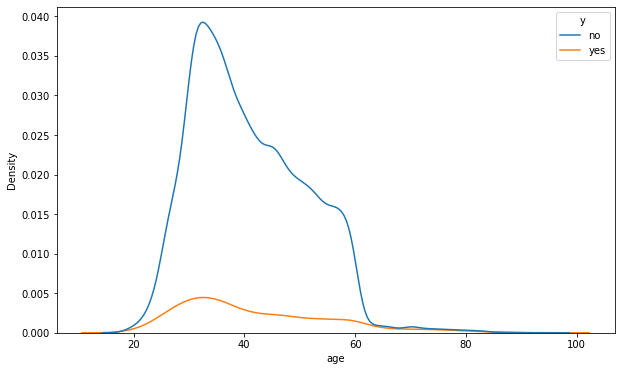

In [ ]:
plt.figure(figsize=(10,6))

sns.kdeplot(x=df['age'],hue=df['y'])

Hypothesis is correct.

# **2. Jobs:**

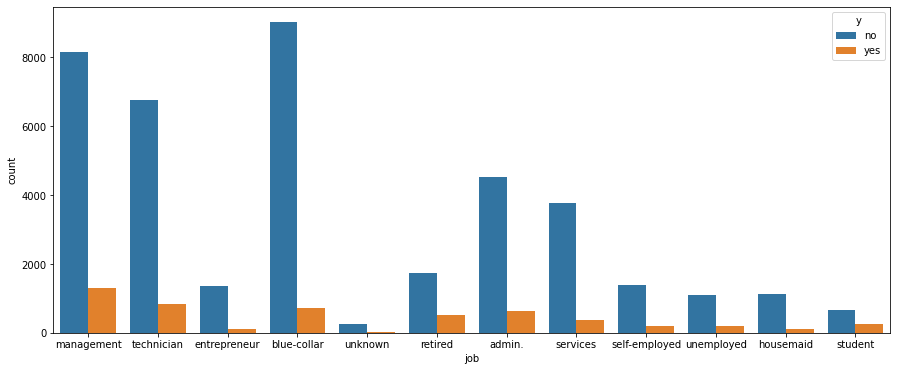

In [ ]:
plt.figure(figsize=(15,6))

sns.countplot(x=df['job'],hue=df['y'])

hypothesis was correct.

# **3. Education:**

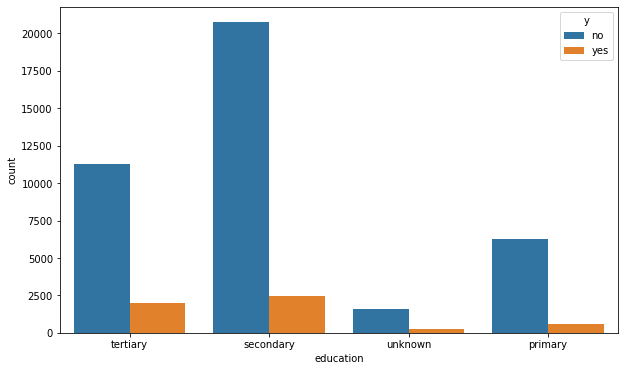

In [ ]:
plt.figure(figsize=(10,6))

sns.countplot(x='education',hue='y',data=df)

Hypothesis was correct.

# **4. Credit Defaulters:**

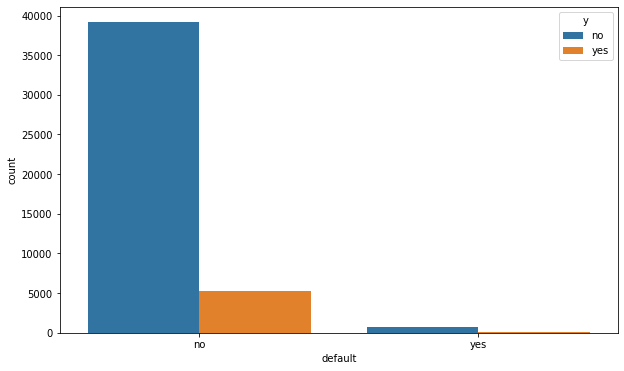

In [ ]:
plt.figure(figsize=(10,6))

sns.countplot(x='default',hue='y',data=df)

Hypothesis was correct.

# **5. Loan:**

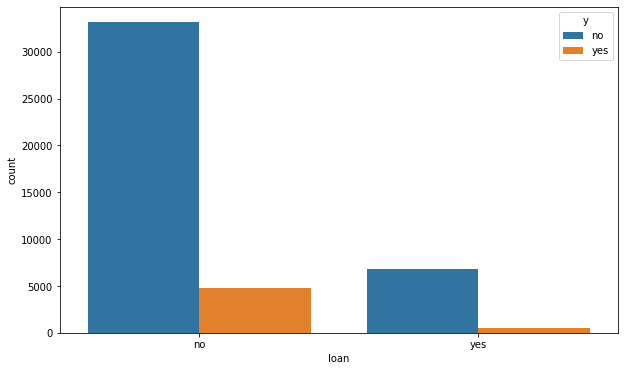

In [ ]:
plt.figure(figsize=(10,6))

sns.countplot(x='loan',hue='y',data=df)

Hypothesis was correct.

# **6. Month**

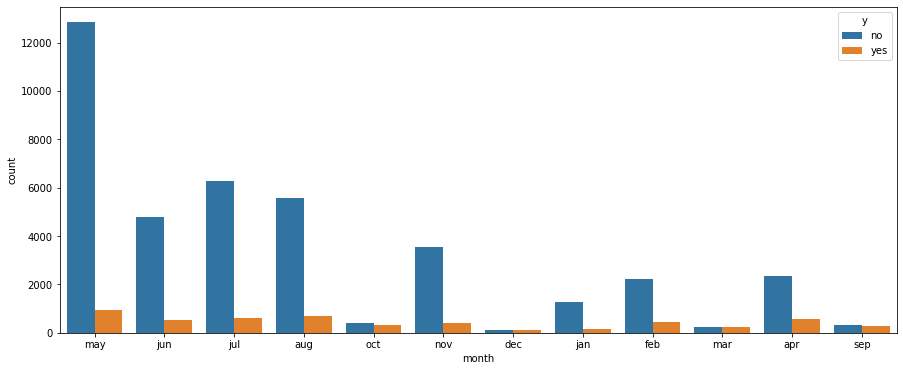

In [ ]:
plt.figure(figsize=(15,6))

sns.countplot(x='month',hue='y',data=df)

Iberian Mask Festival has influenced the TD being said No to most.

# **7. Housing Loans:**

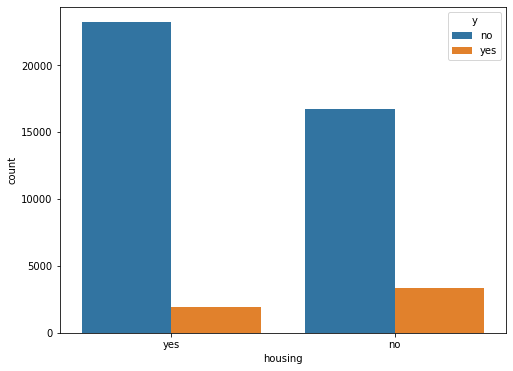

In [ ]:
plt.figure(figsize=(8,6))

sns.countplot(x='housing',hue='y',data=df)

Hypothesis was correct.

# **8. Contact:**

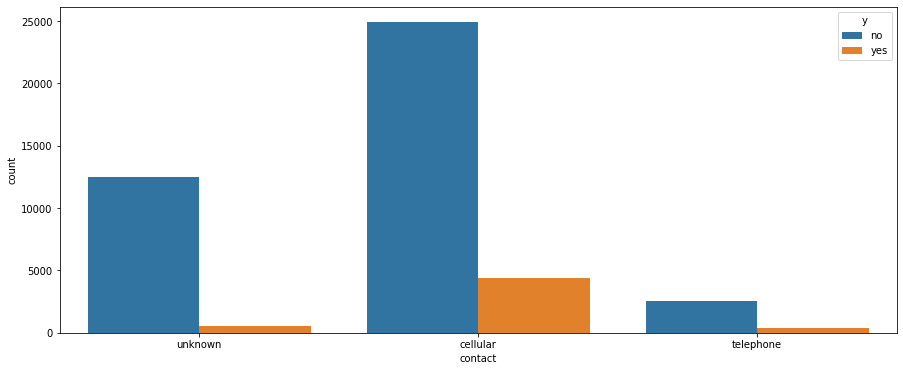

In [ ]:
plt.figure(figsize=(15,6))

sns.countplot(x='contact',hue='y',data=df)

Hypothesis was correct.

# **9. Balance:**

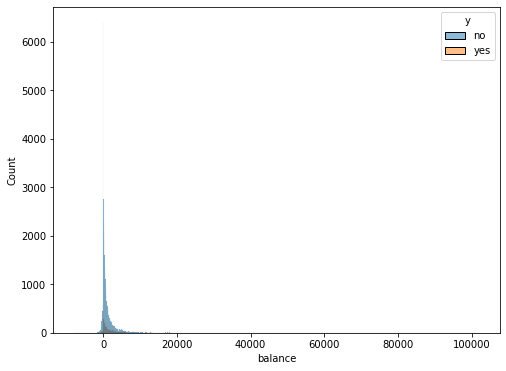

In [ ]:
plt.figure(figsize=(8,6))

sns.histplot(x='balance',hue='y',data=df)

Hypothesis was wrong.

# **10. Previous Outcome:**

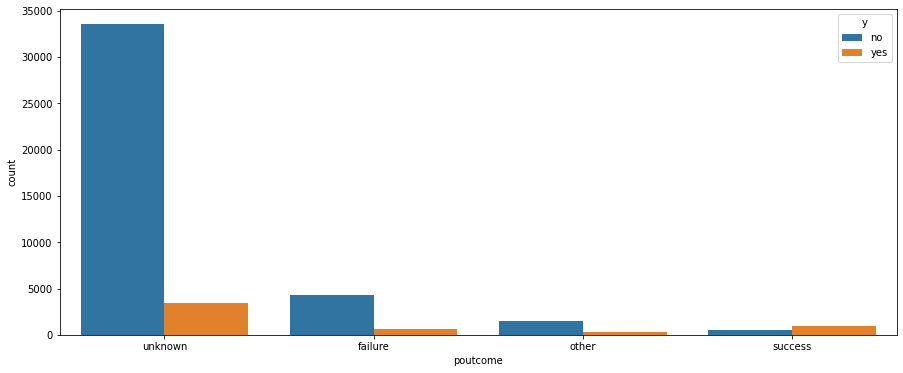

In [ ]:
plt.figure(figsize=(15,6))

sns.countplot(x='poutcome',hue='y',data=df)

Hypothesis was correct.

# **11. Previous Days:**

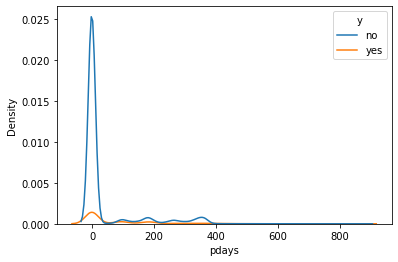

In [ ]:
sns.kdeplot(x='pdays',hue='y',data=df)

Hypothesis was correct.

# **Feature Engineering:**

Changing the categorical variables or the ones holding them to one hot encoding.

In [ ]:
#one hot encoding columns

one_hot_enc_cols=[]

In [ ]:
#AGE

#Converting them to 4 bins according to the age bracket
def convert_age(age):
  if age<33:
    return 'struggling'
  elif age<45:
    return 'stable'
  elif age<60:
    return 'about_to_retire'
  elif age<67:
    return 'old_age'
  else:
    return 'counting_last_breaths'

In [ ]:
df['cat_age'] = df['age'].apply(convert_age)

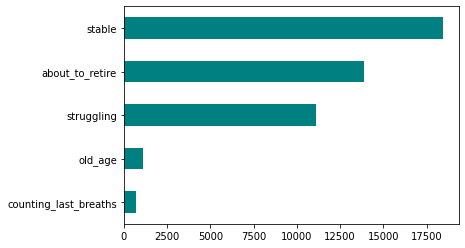

In [ ]:
df['cat_age'].value_counts().sort_values(ascending= True).plot(kind='barh',color='teal')

In [ ]:
one_hot_enc_cols.append('cat_age')

In [ ]:
#job
def cluster_jobs(job):
  new_cat1 = ['technician','services']
  new_cat2 = ['blue-collar','admin.']
  new_cat3 = ['self-employed','housemaid','entrepreneur']
  if job in new_cat1:
    return 'cat1'
  if job in new_cat2:
    return 'cat2'
  if job in new_cat3:
    return 'cat3'
  return job

In [ ]:
df['new_jobs'] = df['job'].apply(cluster_jobs)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


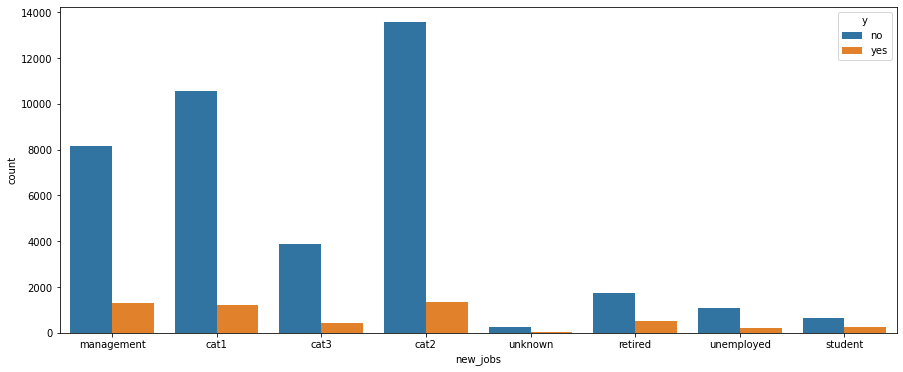

In [ ]:
plt.figure(figsize=(15,6))

sns.countplot(df['new_jobs'],hue=df['y'])

In [ ]:
one_hot_enc_cols.append('new_jobs')

In [ ]:
#A Fair population

#marital
one_hot_enc_cols.append('marital')

#education
one_hot_enc_cols.append('education')

#default
df.default.replace({'no':0,'yes':1},inplace=True)

#housing
df.housing.replace({'no':0,'yes':1},inplace=True)

#loan default
df.loan.replace({'no':0,'yes':1},inplace=True)

#contact
df.contact.replace({'unknown':0, 'cellular':1, 'telephone':1},inplace=True)

#Decided to drop day,month and duration

#poutcome
one_hot_enc_cols.append('poutcome')

In [ ]:
#new Column
df['contacted_before']=df['pdays'].apply(lambda x : 1 if x!=-1 else 0 )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


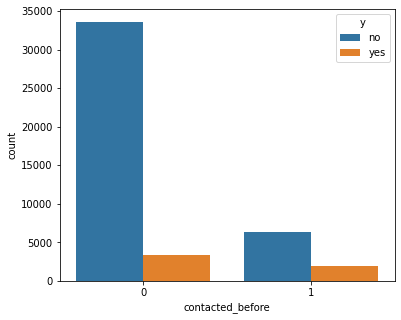

In [52]:
plt.figure(figsize=(6,5))

sns.countplot(df['contacted_before'],hue = df['y'])

In [71]:
new_df = pd.get_dummies(df.drop(['age','job','pdays','day','month','duration'],axis=1),columns = one_hot_enc_cols)

In [86]:
new_df.columns

Index(['default', 'balance', 'housing', 'loan', 'contact', 'campaign',
       'previous', 'y', 'contacted_before', 'cat_age_about_to_retire',
       'cat_age_counting_last_breaths', 'cat_age_old_age', 'cat_age_stable',
       'cat_age_struggling', 'new_jobs_cat1', 'new_jobs_cat2', 'new_jobs_cat3',
       'new_jobs_management', 'new_jobs_retired', 'new_jobs_student',
       'new_jobs_unemployed', 'new_jobs_unknown', 'marital_divorced',
       'marital_married', 'marital_single', 'education_primary',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

# **Nan Value imputaion:**

In [122]:
new_df.isnull().sum()

default                          0
balance                          0
housing                          0
loan                             0
contact                          0
campaign                         0
previous                         0
y                                0
contacted_before                 0
cat_age_about_to_retire          0
cat_age_counting_last_breaths    0
cat_age_old_age                  0
cat_age_stable                   0
cat_age_struggling               0
new_jobs_cat1                    0
new_jobs_cat2                    0
new_jobs_cat3                    0
new_jobs_management              0
new_jobs_retired                 0
new_jobs_student                 0
new_jobs_unemployed              0
new_jobs_unknown                 0
marital_divorced                 0
marital_married                  0
marital_single                   0
education_primary                0
education_secondary              0
education_tertiary               0
education_unknown   

# **Outlier Removal by Isolation Forest:**

In [118]:
feature_df = new_df.drop(['y'],axis=1)
from sklearn.ensemble import IsolationForest
anomaly_filter = IsolationForest(contamination=0.1,n_jobs=-1)
anomalies = pd.Series(anomaly_filter.fit_predict(feature_df))
new_df['is_anomaly'] = anomalies
final_df = new_df[new_df['is_anomaly']==1].drop(['is_anomaly'],axis=1)

In [119]:
#Scaling balance

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
final_df['balance'] = pd.Series(mms.fit_transform(final_df['balance'].values.reshape(-1,1)).flatten())

In [123]:
final_df =final_df[~final_df.isin([np.nan, np.inf, -np.inf]).any(1)]

# **Feature Selection:**

# **Extra Trees Classifier:**

Feature Selection with Extra Trees Classifier:

In [76]:
from sklearn.ensemble import ExtraTreesClassifier

In [161]:
final_df['y'].unique()

array(['no', 'yes'], dtype=object)

In [162]:
final_df['y']= final_df['y'].map({'yes':1,'no':0})

In [163]:
X= final_df.drop('y',axis=1)

Y= final_df['y']

In [164]:
# Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)
  
# Training the model
extra_tree_forest.fit(X, Y)
  
# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_
  
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)

In [165]:
features= X.columns

In [166]:
features

Index(['default', 'balance', 'housing', 'loan', 'contact', 'campaign',
       'previous', 'contacted_before', 'cat_age_about_to_retire',
       'cat_age_counting_last_breaths', 'cat_age_old_age', 'cat_age_stable',
       'cat_age_struggling', 'new_jobs_cat1', 'new_jobs_cat2', 'new_jobs_cat3',
       'new_jobs_management', 'new_jobs_retired', 'new_jobs_student',
       'new_jobs_unemployed', 'new_jobs_unknown', 'marital_divorced',
       'marital_married', 'marital_single', 'education_primary',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [167]:
feature_df1=pd.DataFrame({'Features':features, 'Value': feature_importance_normalized})

In [168]:
feature_df1=feature_df1.sort_values(by=['Value'],ascending= False)

In [169]:
#Top 15 features

feature_df1=feature_df1.head(15)

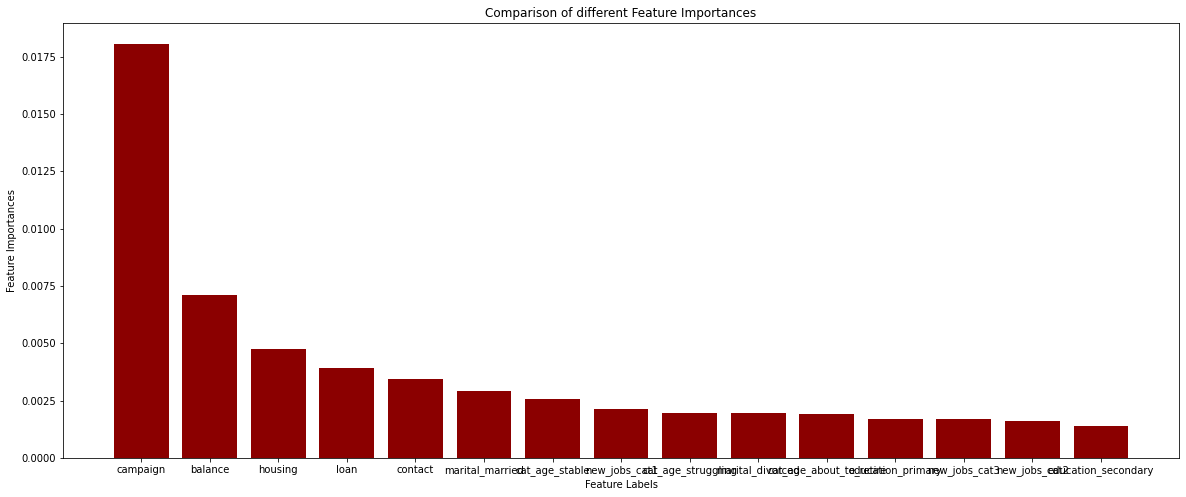

In [170]:
# Plotting a Bar Graph to compare the model features
plt.figure(figsize=(20,8))
plt.bar(feature_df1['Features'], feature_df1['Value'],color='Darkred')
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

In [171]:
list_cols=list(feature_df1['Features'])

In [172]:
#Considering only the top 15 features

X=final_df[list_cols]

# **Oversampling by SMOTE:**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


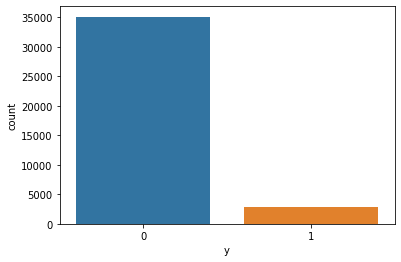

In [174]:
sns.countplot(final_df['y'])

In [175]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE()
X_smote,Y_smote = sampler.fit_resample(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# **Model Selection:**

1. Assumptions of Logistic Regression:

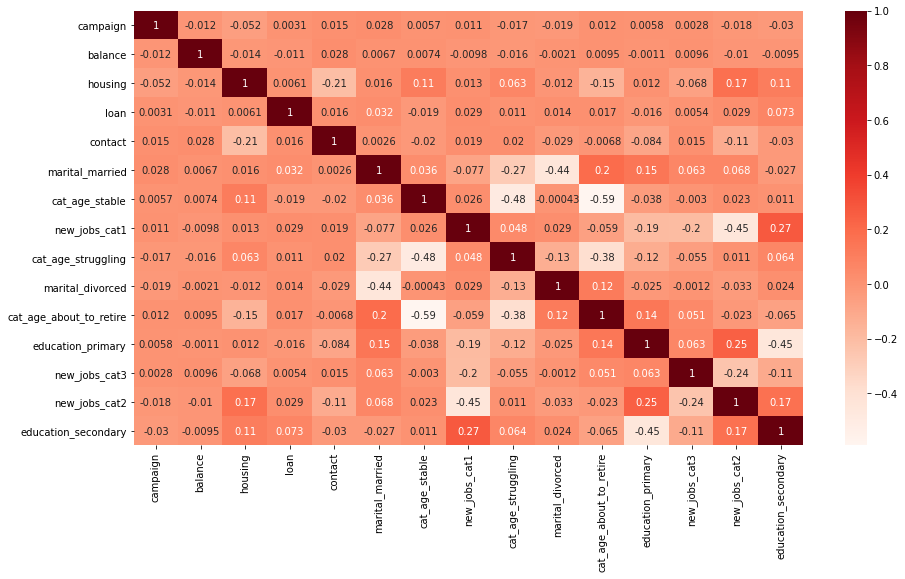

In [176]:
#Using Pearson Correlation
plt.figure(figsize=(15,8))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Correlation between independent variables, we need to use Decision Trees.

But to get a understanding of how it differs let us make a baseline Logistic Model first

# 1. Logistic Regression:

In [142]:
from sklearn.model_selection import train_test_split

In [177]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, Y_smote, test_size=0.25, random_state=42)

In [178]:
y_train

array([1, 1, 0, ..., 1, 0, 0])

In [146]:
from sklearn.model_selection import RandomizedSearchCV

In [179]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [191]:
from sklearn.metrics import f1_score,accuracy_score

In [180]:
y_pred= lr.predict(X_test)

In [183]:
train=[]

test=[]

model=[]

In [181]:
#Train score

f1_score(y_train, lr.predict(X_train))

0.6445655519545184

In [182]:
#Test score
f1_score(y_test, y_pred)


0.6459089186115774

As expected parametric model will not result in a good score.

In [184]:
train.append(f1_score(y_train, lr.predict(X_train)))

test.append(f1_score(y_test, y_pred))

model.append('Logistic Regression')

#2. Decision Tree Classifier:

In [186]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [188]:
y_pred= classifier.predict(X_test)

In [193]:
#Train and test accuracy

print(f'Train Accuracy={accuracy_score(y_train, classifier.predict(X_train))*100}%')

print(f'Test Accuracy={accuracy_score(y_test,y_pred)*100}%')

Train Accuracy=65.80076715658349%
Test Accuracy=65.52352740116213%


In [189]:
#Train score

f1_score(y_train, classifier.predict(X_train))

0.697980949825597

In [190]:
#est score

f1_score(y_test,y_pred)

0.6962152394337918

In [194]:
train.append(f1_score(y_train, classifier.predict(X_train)))
test.append(f1_score(y_test,y_pred))
model.append('Decision Tree')


Visualizing how the decision is taken in Decision Tree:

In [196]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

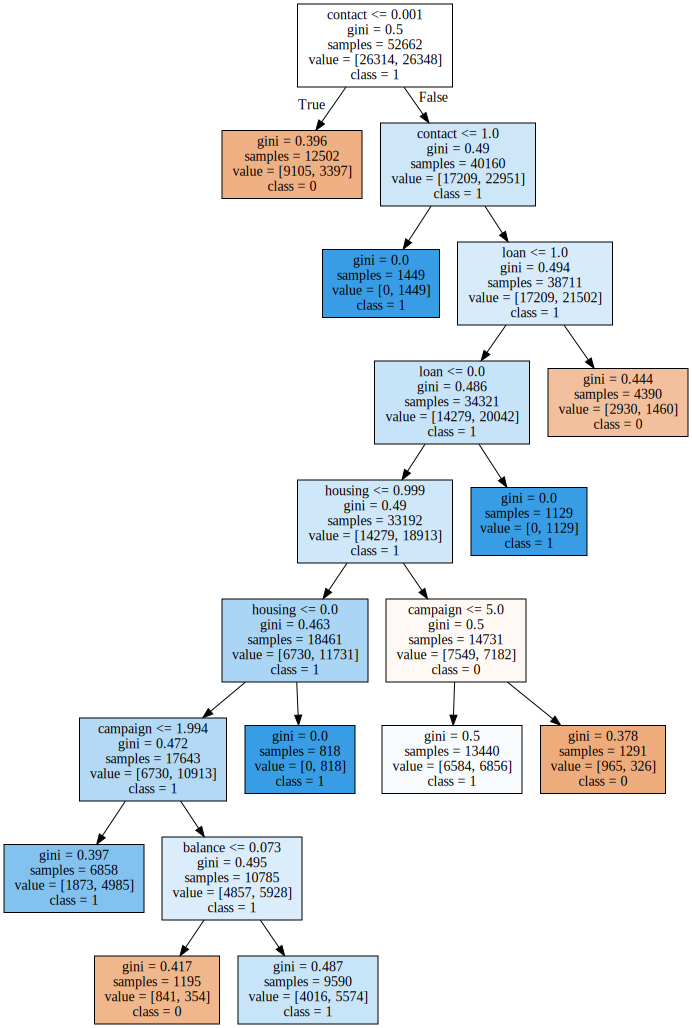

In [198]:
graph = Source(tree.export_graphviz(classifier, out_file=None
   , feature_names=list_cols, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

Train accuracy is higher so model is overfitting,hence use XGBoost with hyperparameter tuning for classification

# 3. XGBoost Classifier:

In [200]:
from xgboost import XGBClassifier

In [201]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the XGBoost
xgb_model = XGBClassifier(learning_rate=0.1)

#RandomSearch
xgb_random = RandomizedSearchCV(xgb_model,param_dict,verbose=2,cv=5)


xgb_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=40, max_depth=8 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=40, max_depth=8, total=   6.5s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=40, max_depth=8 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.5s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=40, max_depth=8, total=   6.3s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=40, max_depth=8 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=40, max_depth=8, total=   6.4s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=40, max_depth=8 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=40, max_depth=8, total=   6.4s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=40, max_depth=8 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=40, max_depth=8, total=   6.2s
[CV] n_estimators=50, min_samples_split=150, min_samples_leaf=40, max_depth=8 
[CV]  n_estimators=50, min_samples_split=150, min_samples_leaf=40, max_depth=8, total=   3.3s
[CV] n_estimators=50, min_samples_split=150, min_samples_leaf=40, max_depth=8 
[CV]  n_estimators=50, min_samples_split=150, min_samples_leaf=40, max_depth=8, total=   3.3s
[CV] n_estimators=50, min_samples_split=1

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='de

In [202]:
#Building optimal model on the best estimators
xgb_model = xgb_random.best_estimator_

In [203]:
# make predictions for test data
y_pred = xgb_model.predict(X_test)

In [205]:
train.append(f1_score(y_train,xgb_model.predict(X_train)))

test.append(f1_score(y_test,y_pred))

model.append('XGBoost')

In [206]:
#Putting scores in datat frame

scores= pd.DataFrame({'F1_score train':train, 'F1_score test':test, 'Model':model})

<Figure size 1440x720 with 0 Axes>

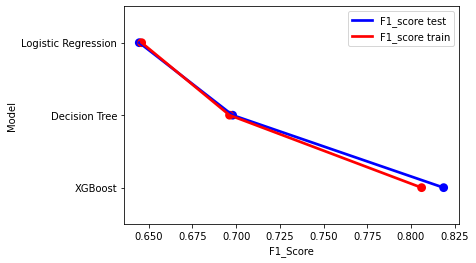

In [207]:
#plotting scores

ax=plt.figure(figsize=(20,10))
# creating subplots
ax = plt.subplots()
# plotting columns
ax = sns.pointplot(x=scores["F1_score train"], y=scores["Model"], color='b',alpha=0.2,labels=('F1_score train'))
ax = sns.pointplot(x=scores["F1_score test"], y=scores["Model"], color='r',alpha=0.7,labels=('F1_score test'))
# renaming the axes
ax.set(xlabel="F1_Score", ylabel="Model")
ax.legend(handles=ax.lines[::len(scores)+1], labels=["F1_score test","F1_score train"])


# visulaizing illustration
plt.show()